## 라이브러리 호출 및 데이터 셋 로드

In [1]:
# 필요한 라이브러리들을 로드합니다.

import numpy as np
import pandas as pd
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns

import optuna
import scipy
from scipy.fft import fft, ifft

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from xgboost import XGBClassifier

In [2]:
full_path  = os.getcwd()
data_path  = os.path.join(full_path, 'Data')

In [3]:
train_path  = os.path.join(data_path, 'train.csv') #여기서 데이터 바꾸기
test_path   = os.path.join(data_path, 'test.csv') #여기서 데이터 바꾸기

In [4]:
# 데이터 셋을 불러옵니다.

data_path  = os.getcwd()

train_path  = os.path.join(data_path, 'train.csv') #여기서 데이터 바꾸기
test_path   = os.path.join(data_path, 'test.csv') #여기서 데이터 바꾸기
sample_path = os.path.join(data_path, 'sample_submission.csv')

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

pd.set_option('display.max_columns', None)
display(df_train)

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,Year,Country,S/N,Label
0,0,-27.419000,-25.272000,-25.474000,-22.805000,-24.078000,-22.308000,-19.020000,-15.117000,-20.164000,-20.565000,-23.472000,-21.460000,-21.296000,-22.971000,-26.662000,-26.166000,-25.218000,-25.145000,-25.128000,-26.031000,-22.715000,-25.193000,-23.018000,-25.840000,-22.264000,-27.556000,-13.707000,25.531000,72.805000,82.108000,26.118000,-62.374000,-79.326000,-49.066000,-34.339000,-24.520000,-24.694000,-19.615000,-18.925000,-15.064000,-16.101000,-11.163000,-11.936000,-6.559700,-3.484800,2.901800,9.552400,13.570000,17.613000,20.590000,23.920000,20.692000,20.495000,14.852000,11.901000,5.031800,0.019212,-7.640100,-10.444000,-17.462000,-17.947000,-21.788000,-21.441000,-20.833000,-22.245000,-23.219000,-24.353000,-21.501000,-22.482000,-19.128000,-18.054000,-12.884000,-14.873000,-14.539000,-17.381000,-18.640000,-21.957000,-20.274000,-20.969000,-23.690000,-25.191000,-25.985000,-24.207000,-25.491000,-24.731000,-26.361000,-20.662000,-22.584000,-22.480000,-22.288000,-21.900000,-24.328000,-25.100000,-6.953500,38.238000,80.280000,77.548000,28.344000,-53.086000,-79.556000,-58.023000,-40.074000,-30.145000,-26.212000,-25.414000,-21.334000,-20.610000,-17.414000,-19.539000,-15.927000,-14.303000,-11.740000,-8.145800,-2.203300,4.929600,5.994700,12.752000,15.910000,17.734000,18.778000,20.524000,14.194000,11.448000,5.126400,0.390350,-7.726800,-13.434000,-17.727000,-21.930000,-24.917000,-26.501000,-27.750000,-30.338000,-26.799000,-28.766000,-25.953000,-27.432000,-22.765000,-25.450000,-19.759000,-18.533000,-20.098000,-26.028000,-27.014000,-27.530000,-28.807000,-31.311000,-34.514000,-32.376000,-34.244000,-32.920000,-34.987000,-32.858000,-34.639000,-32.878000,-34.313000,-30.595000,-34.514000,-33.531000,-33.453000,-18.898000,20.522000,56.785000,65.014000,22.596000,-50.544000,-98.280000,-74.146000,-54.206000,-38.922000,-37.477000,-31.086000,-29.734000,-26.815000,-26.826000,-27.156000,-21.987000,-19.102000,-16.199000,-12.314000,-7.695600,-4.556500,1.381800,1.689300,8.746400,7.856100,11.649000,10.698000,12.543000,8.735100,5.565400,1.831800,-5.701800,-10.316000,-14.452000,-19.

<br/>

## Train 데이터 셋 수정

In [5]:
# 나라 이름을 혼동되지 않게 통일 시켜주겠습니다.

def change_country(df, col_name = 'Country'):

    name_china = ['중국', 'china', '中国']
    name_usa = ['미국', 'USA', 'U.S.', 'america', '美国']
    name_kor = ['대한민국', '한국', 'Korea', 'South Korea', '韩国']

    df[col_name] = ['china' if df.loc[idx, col_name] in  name_china
                    else('america' if df.loc[idx, col_name] in name_usa else 'korea')
                    for idx in range(df.shape[0])]

    return df[col_name]

df_train['Country'] = change_country(df_train)
df_test['Country'] = change_country(df_test)

In [6]:
# Serial Number 의 '-' 이후로 숫자는 크게 의미가 없어 보입니다.
# 그래서 '-' 앞에 알파벳 부분만 남겨두고, 나머지 값들은 제거해주겠습니다.

def change_sn(df, col_name = 'S/N'):

    df[col_name] = [df.loc[idx, col_name].split('-')[0]
                    for idx in range(df.shape[0])]

    return df[col_name]

df_train['S/N'] = change_sn(df_train)
df_test['S/N'] = change_sn(df_test)

In [7]:
# Year 컬럼 값에 따라, 오름차순으로 train 데이터셋을 정렬하겠습니다.
df_train = df_train.sort_values(by = 'Year')

In [8]:
# train 및 test 데이터의 Id 컬럼은, 제거하고 시작하겠습니다.
# 왜냐하면 Id 컬럼은, 단지 로우 인덱스에 불과하기 때문입니다.
df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

<br/>

## Year 컬럼의 의미?

- train set 에 대하여, 연도에 따른 Label 의 count plot 을 그려봤다.
- '전체, 중국, 미국, 한국' 이렇게 데이터 셋을 나눠서 그렸고, 각각의 데이터 셋은 또한 '전체, PSCG, PSFT' 로 구분하여 그려봤다.
- 시각화 결과, '90~99' '01~09(00 은 존재하지 X)', '10~19' 연도끼리 plot 은 비슷한 양상을 나타냈다.
- 따라서 연도 컬럼 값을 ['90~99' -> '90s'], ['01~09' -> '00s'], ['10~19' -> '10s'] 로 변경하기로 하였다.

In [9]:
# plot 을 그리기 위해 준비를 합니다.

# S/N 값 별로 우선 데이터 프레임을 분리해줍니다.
df_PSCG = df_train.loc[df_train['S/N'] == 'PSCG'] # PSCG Data set
df_PSFT = df_train.loc[df_train['S/N'] == 'PSFT'] # PSFT Data set

# 데이터 프레임의 로우 인덱스를 초기화 시켜줍니다.
df_PSCG.reset_index(inplace = True); df_PSCG.drop('index', axis = 1, inplace = True)
df_PSFT.reset_index(inplace = True); df_PSFT.drop('index', axis = 1, inplace = True)

/var/folders/jf/1zq9bw652lb1b4x768n66z0w0000gn/T/ipykernel_2242/3257592502.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSCG.reset_index(inplace = True); df_PSCG.drop('index', axis = 1, inplace = True)
/var/folders/jf/1zq9bw652lb1b4x768n66z0w0000gn/T/ipykernel_2242/3257592502.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSFT.reset_index(inplace = True); df_PSFT.drop('index', axis = 1, inplace = True)


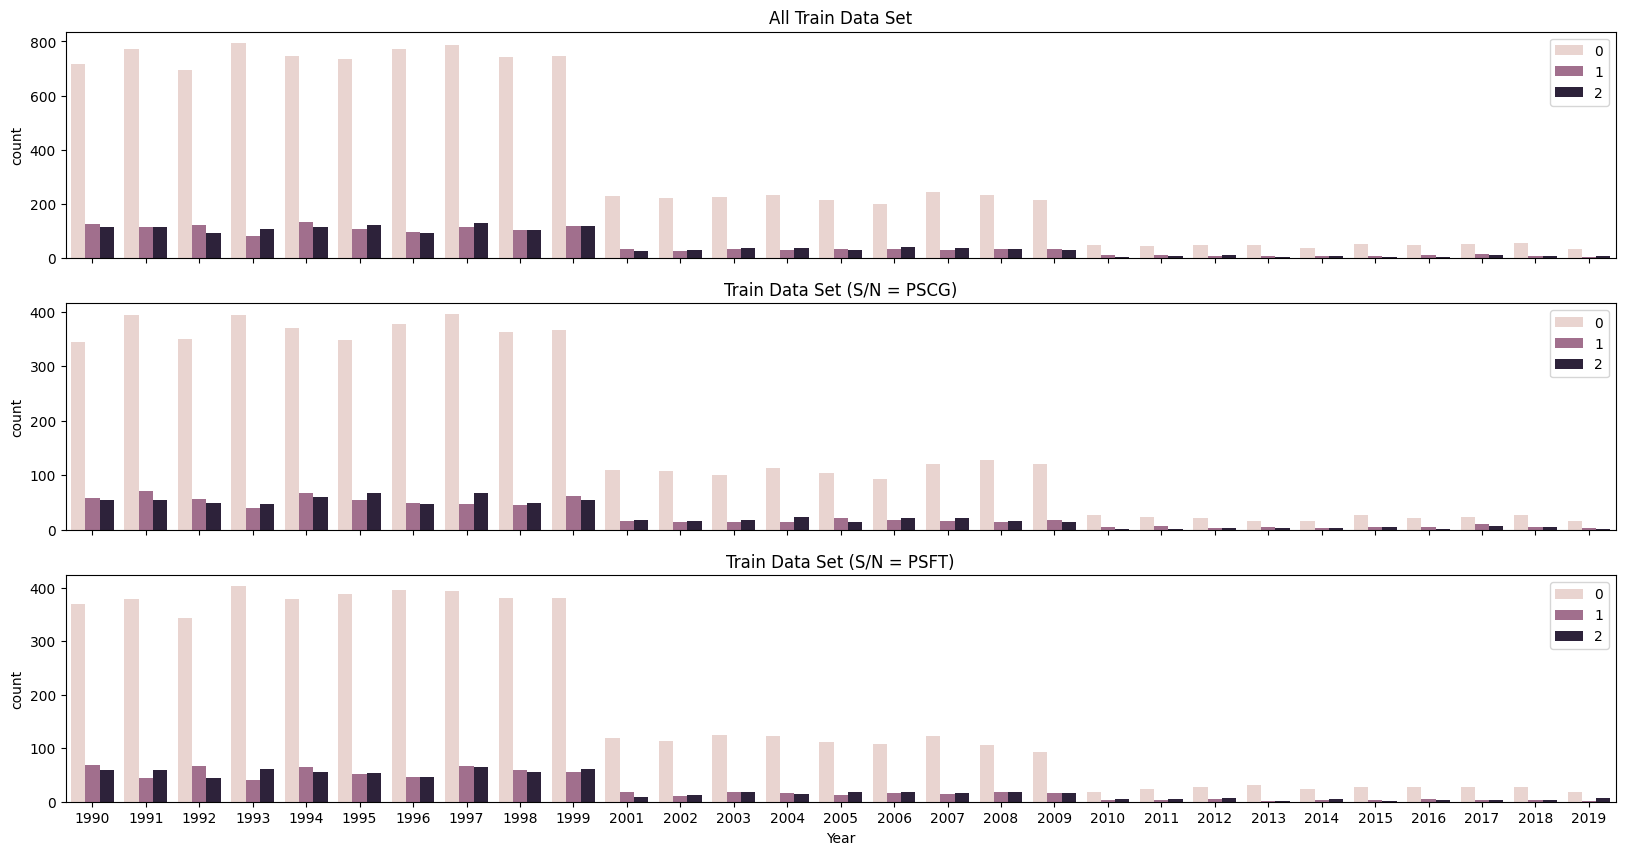

In [10]:
# For All Country

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (20, 10), sharex = True)

sns.countplot(x = 'Year', hue = 'Label', data = df_train, ax = ax1)
sns.countplot(x = 'Year', hue = 'Label', data = df_PSCG, ax = ax2)
sns.countplot(x = 'Year', hue = 'Label', data = df_PSFT, ax = ax3)

ax1.legend(); ax2.legend(); ax3.legend()
ax1.set_title('All Train Data Set')
ax2.set_title('Train Data Set (S/N = PSCG)')
ax3.set_title('Train Data Set (S/N = PSFT)')

plt.show()

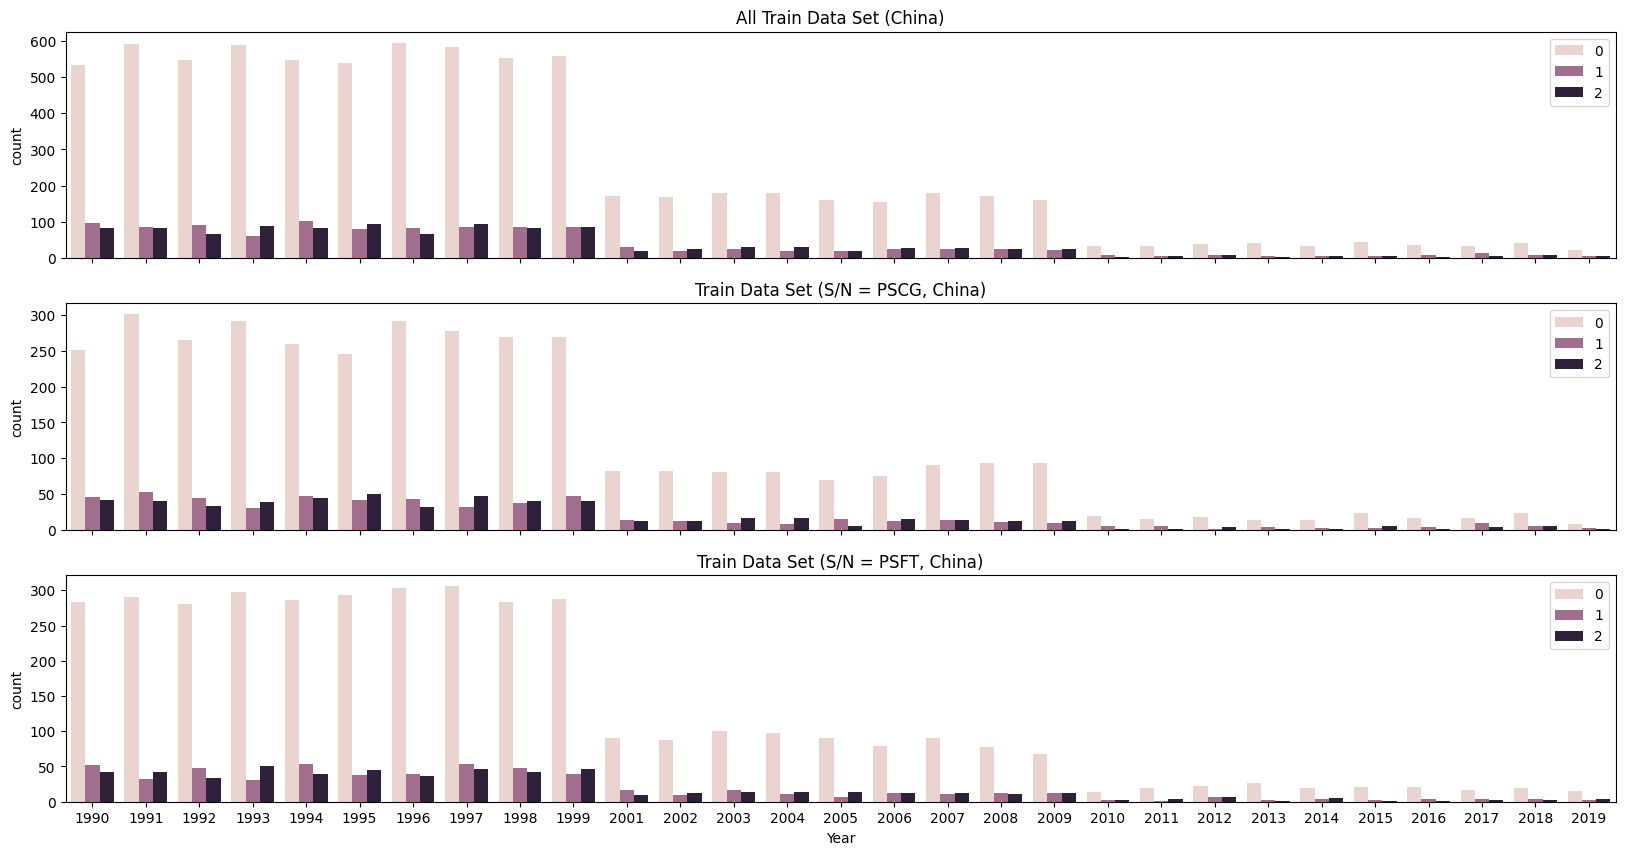

In [11]:
# For China

data_china = df_train[df_train['Country'] == 'china']
PSCG_china = df_PSCG[df_PSCG['Country'] == 'china']
PSFT_china = df_PSFT[df_PSFT['Country'] == 'china']

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (20, 10), sharex = True)

sns.countplot(x = 'Year', hue = 'Label', data = data_china, ax = ax1)
sns.countplot(x = 'Year', hue = 'Label', data = PSCG_china, ax = ax2)
sns.countplot(x = 'Year', hue = 'Label', data = PSFT_china, ax = ax3)

ax1.legend(); ax2.legend(); ax3.legend()
ax1.set_title('All Train Data Set (China)')
ax2.set_title('Train Data Set (S/N = PSCG, China)')
ax3.set_title('Train Data Set (S/N = PSFT, China)')

plt.show()

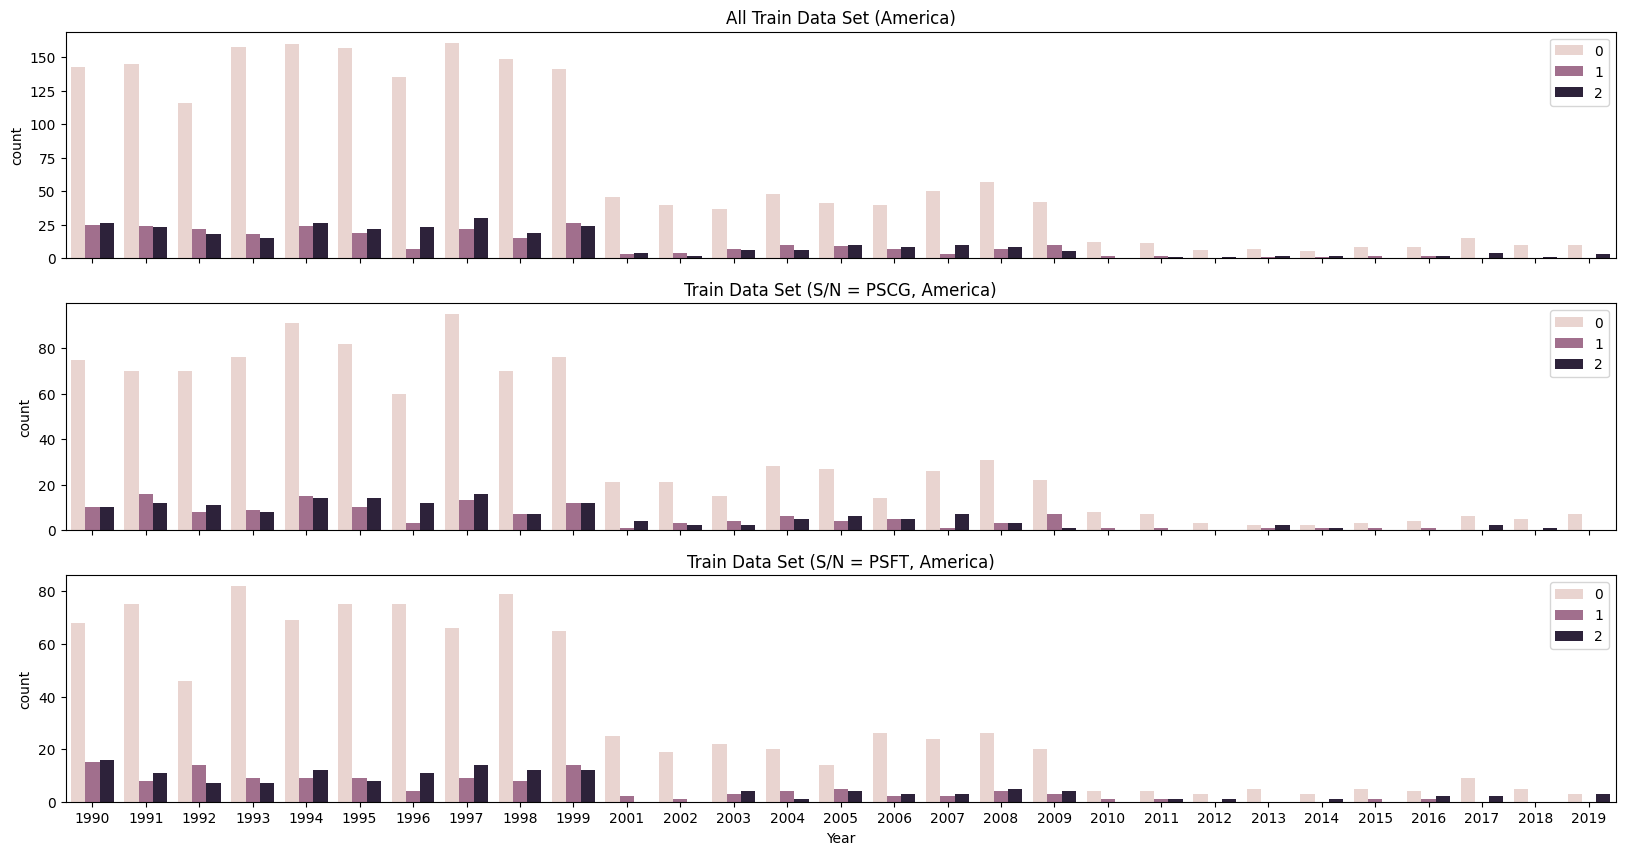

In [12]:
# For USA

data_america = df_train[df_train['Country'] == 'america']
PSCG_america = df_PSCG[df_PSCG['Country'] == 'america']
PSFT_america = df_PSFT[df_PSFT['Country'] == 'america']

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (20, 10), sharex = True)

sns.countplot(x = 'Year', hue = 'Label', data = data_america, ax = ax1)
sns.countplot(x = 'Year', hue = 'Label', data = PSCG_america, ax = ax2)
sns.countplot(x = 'Year', hue = 'Label', data = PSFT_america, ax = ax3)

ax1.legend(); ax2.legend(); ax3.legend()
ax1.set_title('All Train Data Set (America)')
ax2.set_title('Train Data Set (S/N = PSCG, America)')
ax3.set_title('Train Data Set (S/N = PSFT, America)')

plt.show()

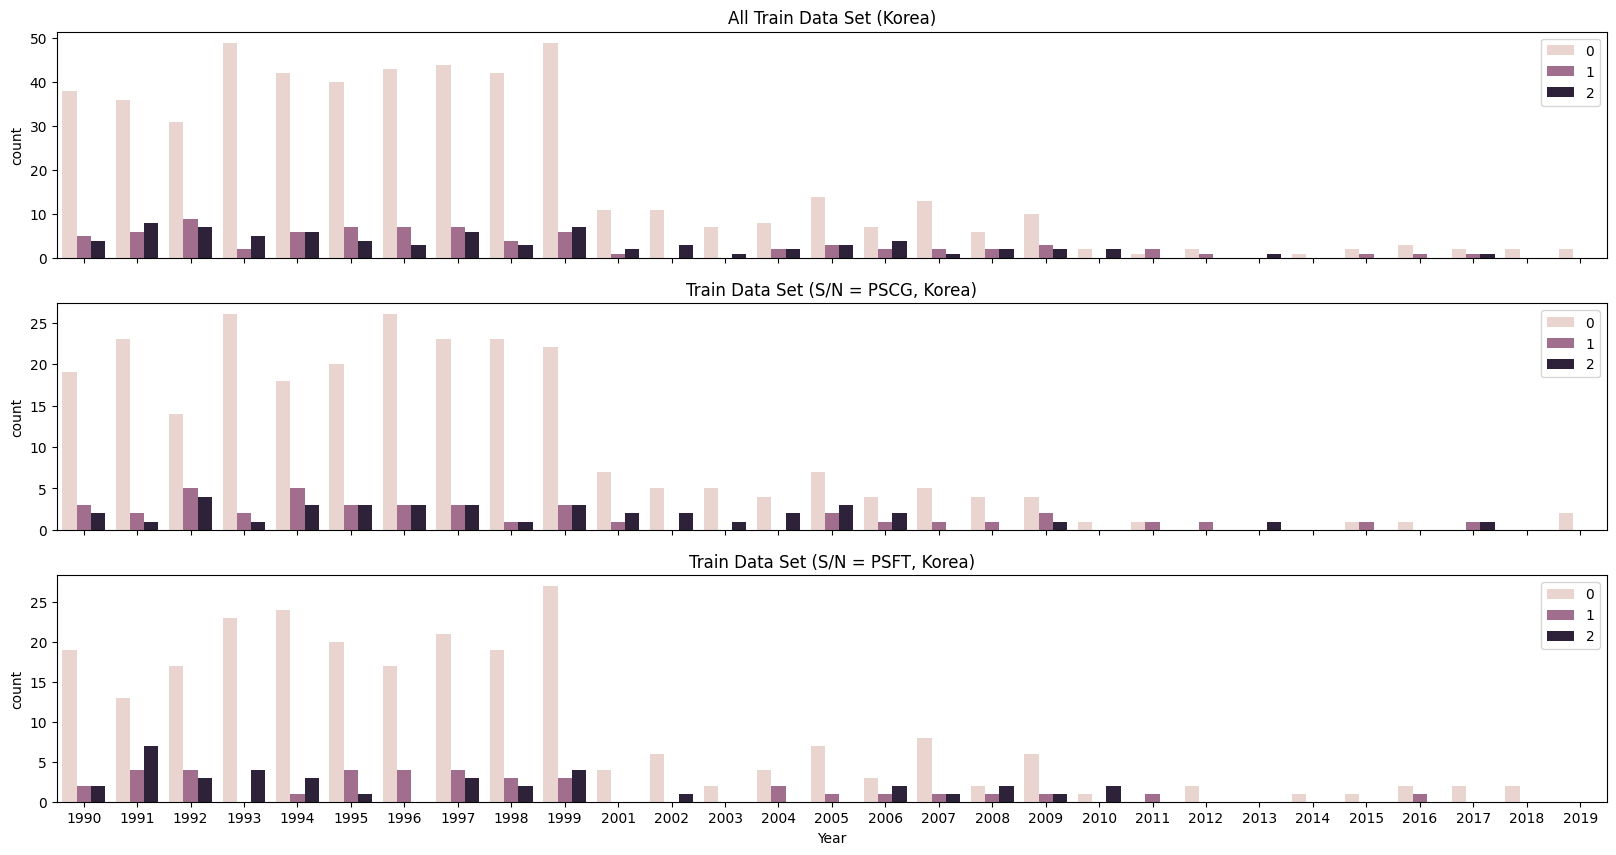

In [13]:
# For Korea

data_korea = df_train[df_train['Country'] == 'korea']
PSCG_korea = df_PSCG[df_PSCG['Country'] == 'korea']
PSFT_korea = df_PSFT[df_PSFT['Country'] == 'korea']

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (20, 10), sharex = True)

sns.countplot(x = 'Year', hue = 'Label', data = data_korea, ax = ax1)
sns.countplot(x = 'Year', hue = 'Label', data = PSCG_korea, ax = ax2)
sns.countplot(x = 'Year', hue = 'Label', data = PSFT_korea, ax = ax3)

ax1.legend(); ax2.legend(); ax3.legend()
ax1.set_title('All Train Data Set (Korea)')
ax2.set_title('Train Data Set (S/N = PSCG, Korea)')
ax3.set_title('Train Data Set (S/N = PSFT, Korea)')

plt.show()

In [14]:
# Year 컬럼의 값들을 변경해주겠습니다.
# ['90~99' -> '90s'], ['01~09' -> '00s'], ['10~19' -> '10s']

df_train['Year'] = ['90s' if df_train.loc[idx, 'Year'] <= 2000
                    else('00s' if df_train.loc[idx, 'Year'] < 2010 else '10s')
                    for idx in range(df_train.shape[0])]

df_PSCG['Year'] = ['90s' if df_PSCG.loc[idx, 'Year'] <= 2000
                    else('00s' if df_PSCG.loc[idx, 'Year'] < 2010 else '10s')
                    for idx in range(df_PSCG.shape[0])]

df_PSFT['Year'] = ['90s' if df_PSFT.loc[idx, 'Year'] <= 2000
                    else('00s' if df_PSFT.loc[idx, 'Year'] < 2010 else '10s')
                    for idx in range(df_PSFT.shape[0])]

df_test['Year'] = ['90s' if df_test.loc[idx, 'Year'] <= 2000
                    else('00s' if df_test.loc[idx, 'Year'] < 2010 else '10s')
                    for idx in range(df_test.shape[0])]

/var/folders/jf/1zq9bw652lb1b4x768n66z0w0000gn/T/ipykernel_2242/3475364991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSCG['Year'] = ['90s' if df_PSCG.loc[idx, 'Year'] <= 2000
/var/folders/jf/1zq9bw652lb1b4x768n66z0w0000gn/T/ipykernel_2242/3475364991.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSFT['Year'] = ['90s' if df_PSFT.loc[idx, 'Year'] <= 2000


In [15]:
# train set 에서, 겹치는 행이 있다면 제거해줍니다.
df_train.drop_duplicates(inplace = True)

# 겹치는 행을 제거해줬으므로, 로우 인덱스를 초기화 시켜줍니다.
df_train.reset_index(inplace = True); df_train.drop('index', axis = 1, inplace = True)

<br/>

## 결측치 보간

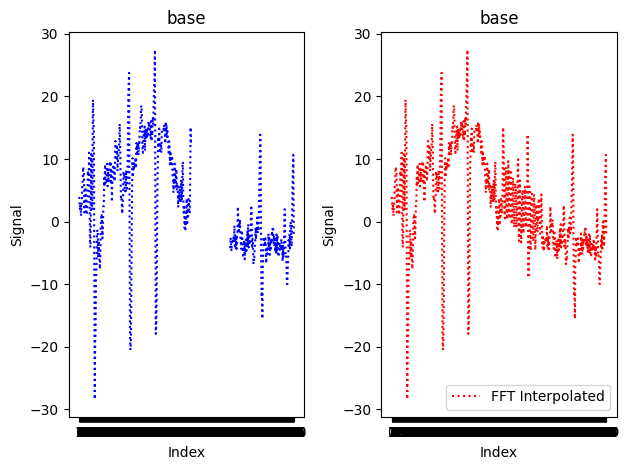

훈련데이터 셋의 결측치 수: 0


In [16]:
# 예시 데이터
origin_ex = df_train.iloc[10, 0:500].astype(float)

# FFT 기반 결측치 보간 함수
def fft_interpolate(signal):

    n = len(signal)
    signal_filled = signal.copy().values
    nan_indices = np.where(np.isnan(signal_filled))[0]
    non_nan_indices = np.where(~np.isnan(signal_filled))[0]
    signal_fft = fft(signal_filled[non_nan_indices])
    reconstructed_signal = np.real(ifft(signal_fft, n=n))
    signal_filled[nan_indices] = reconstructed_signal[nan_indices]
    
    return pd.Series(signal_filled, index=signal.index)


# 결측치 보간 진행(예시)
fft_interpolated = fft_interpolate(origin_ex)


# 보간 결과 시각화(예시)

plt.subplot(1, 2, 1)
plt.plot(origin_ex, label='Original Signal with NaNs', color='blue', linestyle='dotted')
plt.title('base')
plt.xlabel('Index')
plt.ylabel('Signal')

plt.subplot(1, 2, 2)
plt.plot(fft_interpolated, label='FFT Interpolated', color='red', linestyle='dotted')
plt.title('base')
plt.xlabel('Index')
plt.ylabel('Signal')
plt.legend()

plt.tight_layout()
plt.show()


# 모든 행에 대해 보간 적용
df_train.iloc[:, 0:500] = df_train.iloc[:, 0:500].astype('float').apply(fft_interpolate, axis = 1)
df_test.iloc[:, 0:500] = df_test.iloc[:, 0:500].astype('float').apply(fft_interpolate, axis = 1)


# 결측치가 보간된 데이터의 이상치가 존재하는지 확인
num_na = df_train.isna().sum().max()
print(f'훈련데이터 셋의 결측치 수: {num_na}')

<br/>

## 파생 변수 생성 (1)

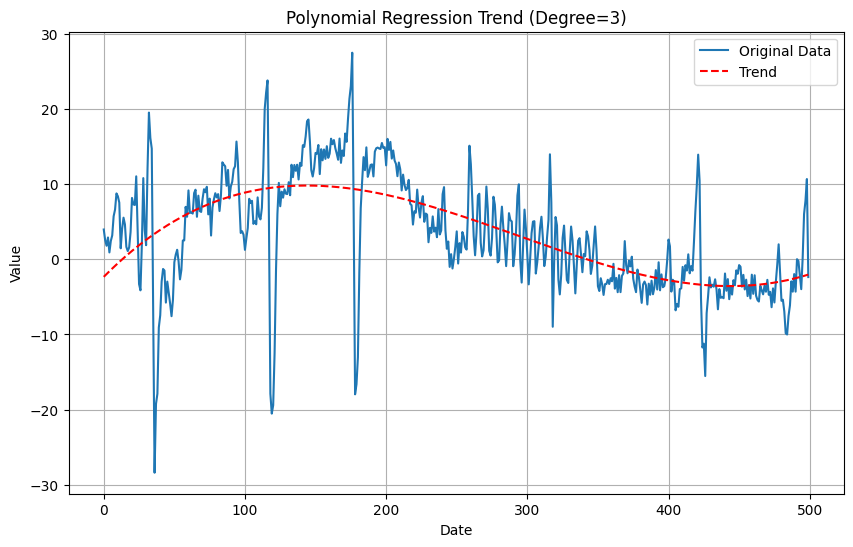

In [17]:
# 일차적으로 다항회귀를 이용해 추세를 추정합니다 #

# 사용할 예시 데이터
data_ex = df_train.iloc[10, 0:500]

# 다항 특성 변환
poly = PolynomialFeatures(degree = 3, include_bias = False)
x_val = np.array([int(x) for x in data_ex.index])
X_poly = poly.fit_transform(x_val.reshape(-1, 1))

# 다항 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, data_ex)

# 추세 예측
trend = model.predict(X_poly)

# 추세 시각화
plt.figure(figsize=(10, 6))
plt.plot(data_ex.values, label = 'Original Data')
plt.plot(trend, label='Trend', linestyle='--', color='red')
plt.title('Polynomial Regression Trend (Degree=3)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

추정되는 주기의 값은 62 입니다.


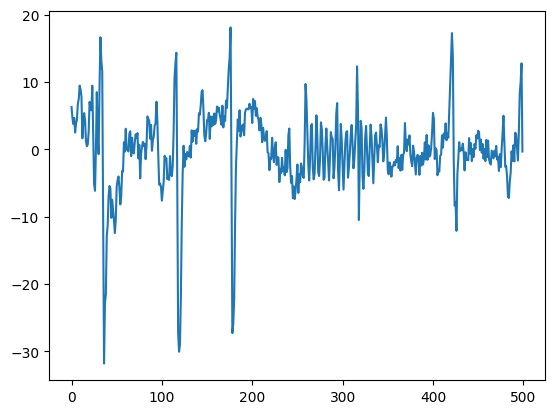

In [18]:
# 추세가 잘 제거됐는지 확인해봅니다.
data_no_trend = data_ex.values - trend
plt.plot(data_no_trend)


# 추세를 제거한 데이터에 대해 계절성 주기를 FFT 로 추정합니다.
fft_result = fft(data_no_trend)
frequencies = np.fft.fftfreq(len(fft_result))
peak_frequency = abs(frequencies[np.argmax(np.abs(fft_result[1:])) + 1])  # 피크 주파수 찾기

if int(1 / peak_frequency) == 500: periods = 0 # 주기가 없는 경우
else: periods = int(1 / peak_frequency)

print(f'추정되는 주기의 값은 {periods} 입니다.')

In [19]:
# 지금까지의 과정들을 함수로 만들어 줍니다.

def find_trend(data):

    # 주어진 시계열 데이터에 대해, 다항 회귀 모델을 학습시킨 뒤,
    # '모델의 계수값' 및 '추세를 제거한 데이터 값' 을 리턴합니다.

    # 다항 특성 변환
    poly = PolynomialFeatures(degree = 3, include_bias = False)
    x_val = np.array([int(x) for x in data.index])
    X_poly = poly.fit_transform(x_val.reshape(-1, 1))

    # 다항 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_poly, data)

    # 추세 예측
    trend = model.predict(X_poly)

    return model.coef_, data - trend



def find_season(data):

    model_coef = find_trend(data)[0] # 추세 다항회귀 추정모델 계수 값 
    data_no_trend = find_trend(data)[1] # 추세를 제거한 데이터 값

    # FFT 를 이용해 주기를 추정
    fft_result = scipy.fftpack.fft(data_no_trend)
    frequencies = np.fft.fftfreq(len(fft_result))
    peak_frequency = abs(frequencies[np.argmax(np.abs(fft_result[1:])) + 1])  # 피크 주파수 찾기

    if int(1 / peak_frequency) == 500: periods = 0 # 주기가 없는 경우
    else: periods = int(1 / peak_frequency)
    
    return model_coef, periods

In [20]:
# 해당 함수들을 이용하여 새로운 파생변수들을 만들어줍니다.

df_train['poly_x1'] = [find_season(df_train.iloc[idx, 0:500])[0][0] for idx in range(df_train.shape[0])]
df_train['poly_x2'] = [find_season(df_train.iloc[idx, 0:500])[0][1] for idx in range(df_train.shape[0])]
df_train['poly_x3'] = [find_season(df_train.iloc[idx, 0:500])[0][2] for idx in range(df_train.shape[0])]
df_train['periods'] = [find_season(df_train.iloc[idx, 0:500])[1] for idx in range(df_train.shape[0])]

In [21]:
# 테스트 세트에도 같은 방식을 적용해, 새로운 파생변수들을 만들어줍니다.

df_test['poly_x1'] = [find_season(df_test.iloc[idx, 0:500])[0][0] for idx in range(df_test.shape[0])]
df_test['poly_x2'] = [find_season(df_test.iloc[idx, 0:500])[0][1] for idx in range(df_test.shape[0])]
df_test['poly_x3'] = [find_season(df_test.iloc[idx, 0:500])[0][2] for idx in range(df_test.shape[0])]
df_test['periods'] = [find_season(df_test.iloc[idx, 0:500])[1] for idx in range(df_test.shape[0])]

<br/>

## 파생 변수 생성 (2)

그룹으로 묶었을 때, 라벨에 따른 데이터의 plot 의 차이를 확인해보겠습니다.

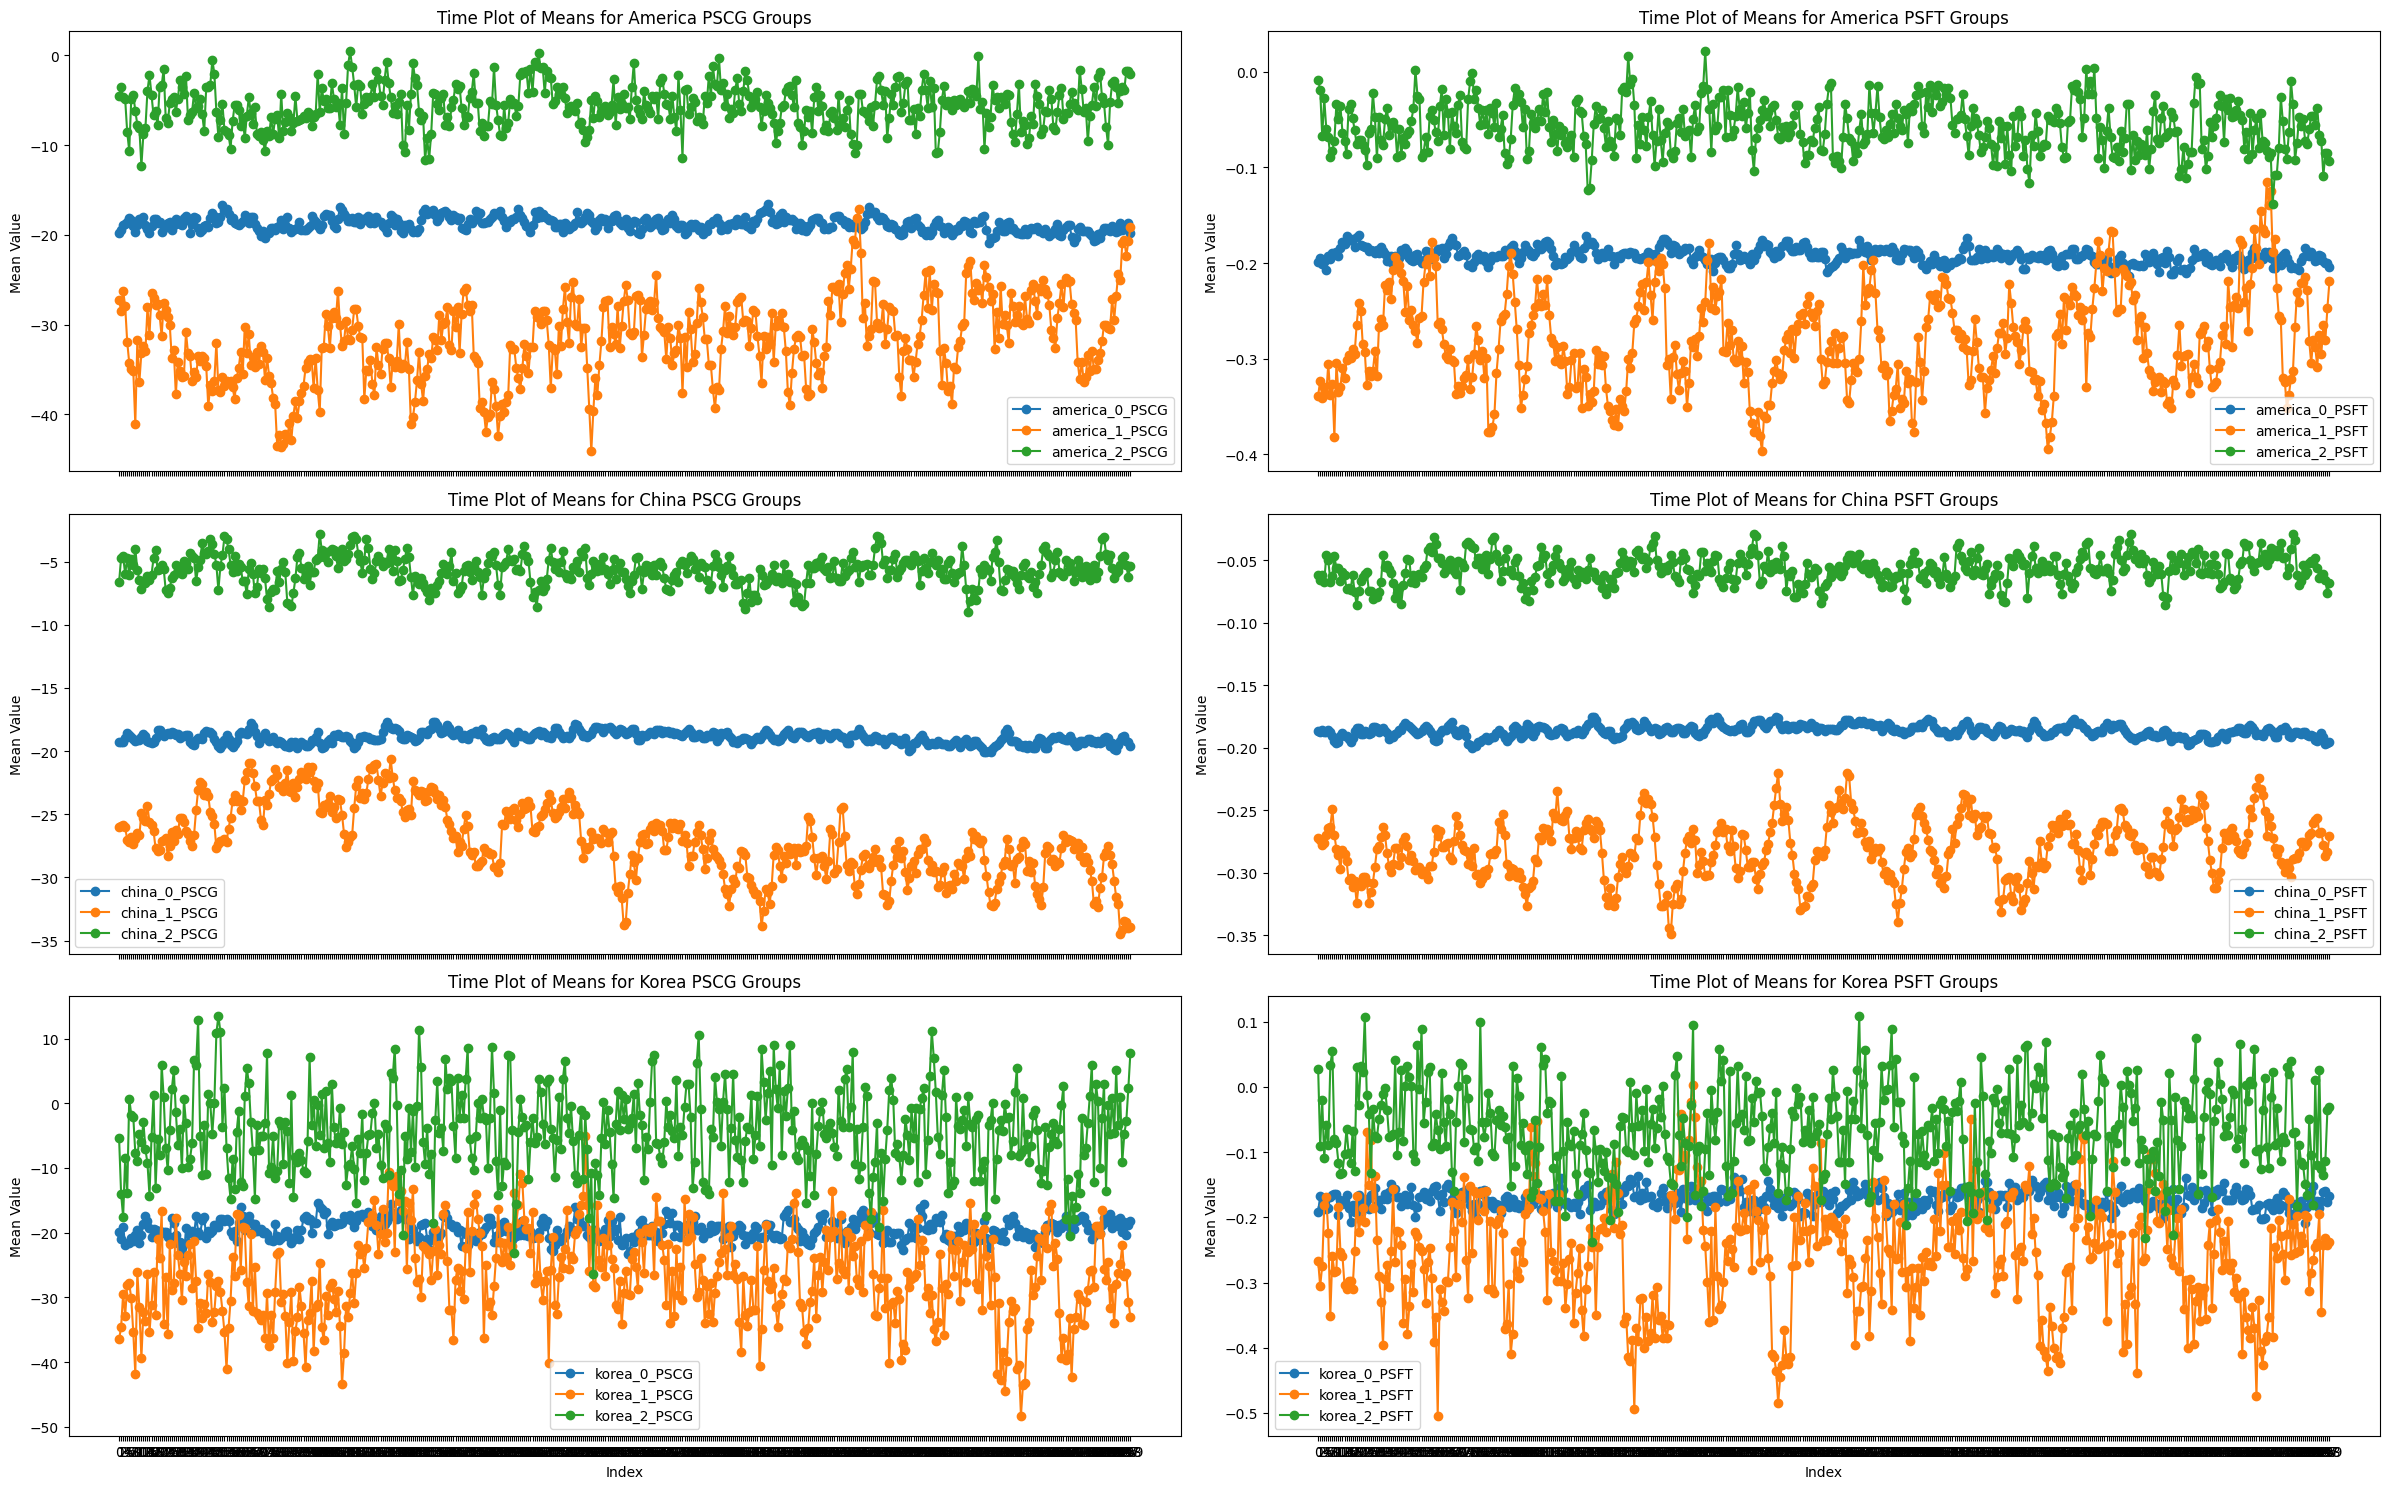

In [22]:
# Country와 Label의 고유값들로 그룹 나누기
grouped = df_train.groupby(['Country', 'Label','S/N'])

# 그룹을 저장할 딕셔너리 초기화
group_dict = {}

# 그룹별로 데이터 출력 및 저장
for (countries, label, sn), group in grouped:
    group_name = f"{countries}_{label}_{sn}"
    group_dict[group_name] = group

selected_columns2 = [str(i) for i in range(500)]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 15), sharex=True)

# 국가별로 그룹을 합쳐서 그래프 그리기
countries = ['america', 'china', 'korea'] # 국가 정의

for i, countries in enumerate(countries): # 각 국가별로 해당 과정 반복
    # PSCG 그룹 그래프 그리기
    pscg_group_names = [group_name for group_name in group_dict.keys() if group_name.startswith(f'{countries}_') and group_name.endswith('_PSCG')]
    # 국가별 PSCG 그룹 이름을 필터링 (그룹 이름이 해당 국가로 시작하고 '_PSCG'로 끝나는 경우 label 0,1,2가 있으니 3개가 나올 것)
    for group_name in pscg_group_names: # 각 라벨별로 그림 그리기
        selected2 = group_dict[group_name][selected_columns2].T  # Transpose하여 행별로 평균을 계산할 준비
        row_means = selected2.mean(axis=1) # 행 별 평균 계산 (즉, 해당 time의 평균값)
        axes[i, 0].plot(selected2.index, row_means, marker='o', linestyle='-', label=group_name) # 해당 국가와 S/N끼리 같은 위치에 나타날 것

    # PSFT 그룹 그래프 그리기
    psft_group_names = [group_name for group_name in group_dict.keys() if group_name.startswith(f'{countries}_') and group_name.endswith('_PSFT')]
    for group_name in psft_group_names:
        selected2 = group_dict[group_name][selected_columns2].T  # Transpose하여 행별로 평균을 계산할 준비
        row_means = selected2.mean(axis=1)
        axes[i, 1].plot(selected2.index, row_means, marker='o', linestyle='-', label=group_name)

    # 그래프에 축 레이블, 제목 추가
    axes[i, 0].set_ylabel('Mean Value')
    axes[i, 0].set_title(f'Time Plot of Means for {countries.capitalize()} PSCG Groups')
    axes[i, 0].legend()

    axes[i, 1].set_ylabel('Mean Value')
    axes[i, 1].set_title(f'Time Plot of Means for {countries.capitalize()} PSFT Groups')
    axes[i, 1].legend()

# 마지막 서브플롯에 x 축 레이블 추가
for ax in axes[-1, :]:
    ax.set_xlabel('Index')

plt.tight_layout()
plt.show()

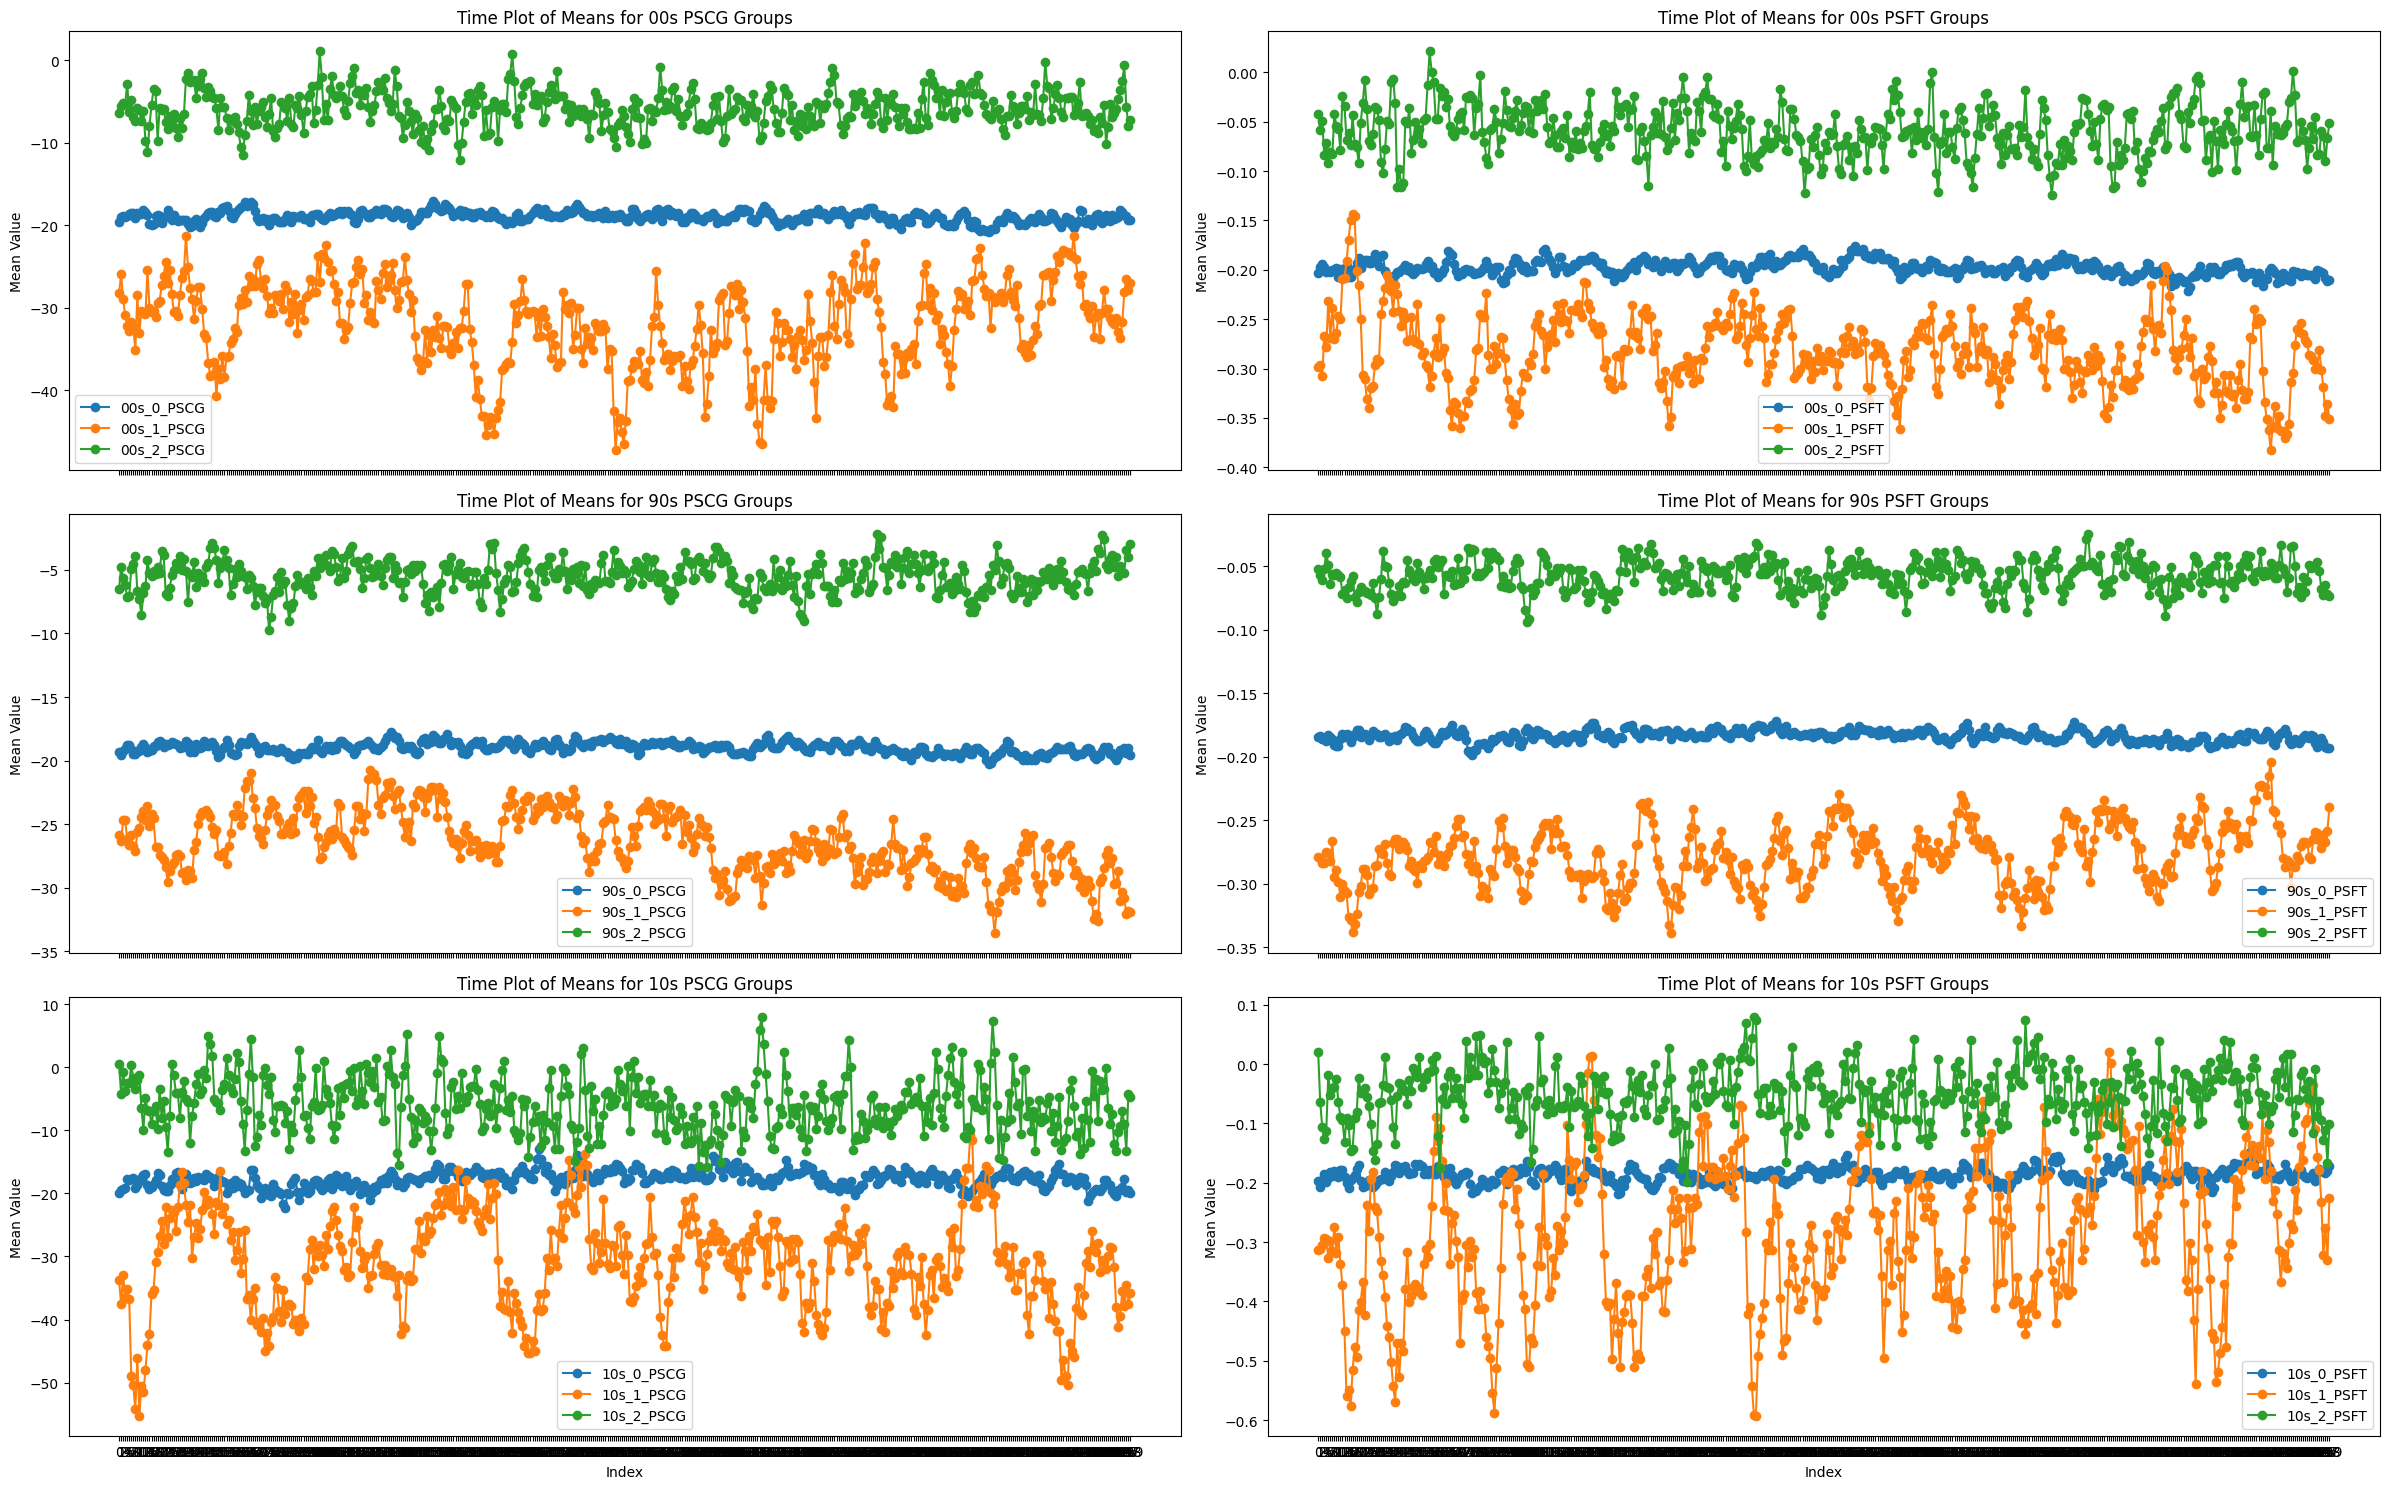

In [23]:
# Country와 Label의 고유값들로 그룹 나누기
grouped = df_train.groupby(['Year', 'Label','S/N'])

# 그룹을 저장할 딕셔너리 초기화
group_dict = {}

# 그룹별로 데이터 출력 및 저장
for (year, label, sn), group in grouped:
    group_name = f"{year}_{label}_{sn}"
    group_dict[group_name] = group

selected_columns2 = [str(i) for i in range(500)]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 15), sharex=True)

# 연도별로 그룹을 합쳐서 그래프 그리기
year = ['00s', '90s', '10s']

for i, year in enumerate(year): # 각 연도별로 해당 과정 반복
    # PSCG 그룹 그래프 그리기
    pscg_group_names = [group_name for group_name in group_dict.keys() if group_name.startswith(f'{year}_') and group_name.endswith('_PSCG')]
    # 연도별 PSCG 그룹 이름을 필터링 (그룹 이름이 해당 연도로 시작하고 '_PSCG'로 끝나는 경우 label 0,1,2가 있으니 3개가 나올 것)
    for group_name in pscg_group_names: # 각 라벨별로 그림 그리기
        selected2 = group_dict[group_name][selected_columns2].T  # Transpose하여 행별로 평균을 계산할 준비
        row_means = selected2.mean(axis=1) # 행 별 평균 계산 (즉, 해당 time의 평균값)
        axes[i, 0].plot(selected2.index, row_means, marker='o', linestyle='-', label=group_name) # 해당 연도와 S/N끼리 같은 위치에 나타날 것

    # PSFT 그룹 그래프 그리기
    psft_group_names = [group_name for group_name in group_dict.keys() if group_name.startswith(f'{year}_') and group_name.endswith('_PSFT')]
    for group_name in psft_group_names:
        selected2 = group_dict[group_name][selected_columns2].T  # Transpose하여 행별로 평균을 계산할 준비
        row_means = selected2.mean(axis=1)
        axes[i, 1].plot(selected2.index, row_means, marker='o', linestyle='-', label=group_name)

    # 그래프에 축 레이블, 제목 추가
    axes[i, 0].set_ylabel('Mean Value')
    axes[i, 0].set_title(f'Time Plot of Means for {year.capitalize()} PSCG Groups')
    axes[i, 0].legend()

    axes[i, 1].set_ylabel('Mean Value')
    axes[i, 1].set_title(f'Time Plot of Means for {year.capitalize()} PSFT Groups')
    axes[i, 1].legend()

# 마지막 서브플롯에 x 축 레이블 추가
for ax in axes[-1, :]:
    ax.set_xlabel('Index')

plt.tight_layout()
plt.show()

일단 mean plot 을 그려보면, 우선 S/N 에 plot 의 값 range 에 차이가 좀 많이 나타납니다.
<br>(Year, S/N) 으로 그룹을 묶었을 때, 라벨에 따른 plot 의 겹침 현상이 덜 합니다.
<br>이는 곧 해당 방법으로 그룹을 묶을 시 더 라벨을 잘 분리할 수 있다는 뜻으로 받아드릴 수 있습니다.
<br>따라서 (Year, S/N) 그룹별로 mean plot 을 토대로 추가적인 파생변수를 생성해보겠습니다.
<br/><br/>

In [24]:
# 추가로 범주 별로도 파생변수를 만들어줍니다. (Year-S/N) #

# pair 생성
group_year = ['90s', '00s', '10s']
group_sn = ['PSCG', 'PSFT']
pairs = [(year, sn) for year in group_year for sn in group_sn] # pair

# 파생 변수명 지정
df_train['poly_x1_mean'] = [0]*(df_train.shape[0])
df_train['poly_x2_mean'] = [0]*(df_train.shape[0])
df_train['poly_x3_mean'] = [0]*(df_train.shape[0])
df_train['periods_mean'] = [0]*(df_train.shape[0])

df_test['poly_x1_mean'] = [0]*(df_test.shape[0])
df_test['poly_x2_mean'] = [0]*(df_test.shape[0])
df_test['poly_x3_mean'] = [0]*(df_test.shape[0])
df_test['periods_mean'] = [0]*(df_test.shape[0])


# 카테고리별 mean_trend 및 mean_season 계산 후 값 대체
mean_list = []
for i in range(len(pairs)):

    col1 = 'Year'; col2 = 'S/N'

    target_df = df_train.loc[(df_train[col1] == pairs[i][0]) & (df_train[col2] == pairs[i][1])]
    mean_val = target_df.iloc[:, 0:500].mean().astype('object')

    df_train.loc[(df_train[col1] == pairs[i][0]) & (df_train[col2] == pairs[i][1]), 'poly_x1_mean'] = find_season(mean_val)[0][0]
    df_train.loc[(df_train[col1] == pairs[i][0]) & (df_train[col2] == pairs[i][1]), 'poly_x2_mean'] = find_season(mean_val)[0][1]
    df_train.loc[(df_train[col1] == pairs[i][0]) & (df_train[col2] == pairs[i][1]), 'poly_x3_mean'] = find_season(mean_val)[0][2]
    df_train.loc[(df_train[col1] == pairs[i][0]) & (df_train[col2] == pairs[i][1]), 'periods_mean'] = find_season(mean_val)[1]

    # data leakage 방지를 위해, train set 의 평균값으로 얻은 데이터를 같은 범주에 그대로 붙여줍니다.
    df_test.loc[(df_test[col1] == pairs[i][0]) & (df_test[col2] == pairs[i][1]), 'poly_x1_mean'] = find_season(mean_val)[0][0]
    df_test.loc[(df_test[col1] == pairs[i][0]) & (df_test[col2] == pairs[i][1]), 'poly_x2_mean'] = find_season(mean_val)[0][1]
    df_test.loc[(df_test[col1] == pairs[i][0]) & (df_test[col2] == pairs[i][1]), 'poly_x3_mean'] = find_season(mean_val)[0][2]
    df_test.loc[(df_test[col1] == pairs[i][0]) & (df_test[col2] == pairs[i][1]), 'periods_mean'] = find_season(mean_val)[1]

/var/folders/jf/1zq9bw652lb1b4x768n66z0w0000gn/T/ipykernel_2242/3244406470.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.009654567395838804' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[(df_train[col1] == pairs[i][0]) & (df_train[col2] == pairs[i][1]), 'poly_x1_mean'] = find_season(mean_val)[0][0]
/var/folders/jf/1zq9bw652lb1b4x768n66z0w0000gn/T/ipykernel_2242/3244406470.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.059501007893099e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[(df_train[col1] == pairs[i][0]) & (df_train[col2] == pairs[i][1]), 'poly_x2_mean'] = find_season(mean_val)[0][1]
/var/folders/jf/1zq9bw652lb1b4x768n66z0w0000gn/T/ipykernel_2242/3244406470.py:31: FutureWarning: Setti

<br/>

### Correlation Map 을 통한 파생변수 Selection 

아무래도 poly_x_mean 컬럼들은, poly_x 컬럼에 속하는 시계열 데이터들의 대표값들이라 볼 수 있습니다.
<br>이렇게 되면 변수간의 correlation 이 커져, 모델의 성능에 악영향을 줄 수도 있습니다.
<br>따라서 먼저 poly_x_mean, poly_x 컬럼들을 이용해 Correlation Matrix 를 그려보겠습니다.

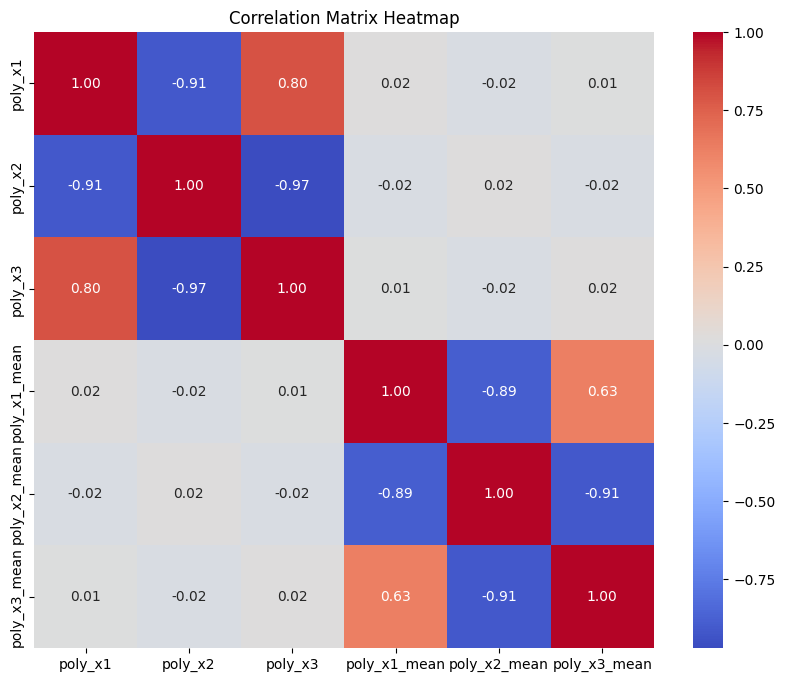

In [25]:

cor_matrix = df_train[['poly_x1','poly_x2','poly_x3','poly_x1_mean','poly_x2_mean','poly_x3_mean']].corr()

#상관계수 히트맵 생성 및 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

poly_x 컬럼의 경우에는 'poly_x1~poly_x3' 컬럼간에 correlation 이 그나마 낮았으며,
<br>poly_x_mean 컬럼은 모든 컬럼 간의 correlation 이 매우 높았습니다.
<br>따라서 먼저 poly_x 컬럼의 경우에는 'poly_x1, poly_x3' 컬럼만을 골라주겠습니다.

In [26]:
df_train.drop('poly_x2', axis = 1, inplace = True)
df_test.drop('poly_x2', axis = 1, inplace = True)

<br/>poly_x_mean 컬럼의 통계량을 뽑아본 결과, 'poly_x1' 이 변수의 scale 및 std 가 제일 높았습니다.
<br>편차 및 scale 이 클 수록 라벨을 잘 분류해줄 가능성이 높기에, poly_x_mean 컬럼은 'poly_x1_mean' 컬럼만을 골라주겠습니다.

In [27]:
# 컬럼 별 통계량 산출

print(df_train['poly_x1_mean'].describe())
print('')
print(df_train['poly_x2_mean'].describe())
print('')
print(df_train['poly_x3_mean'].describe())

count    12661.000000
mean         0.004127
std          0.004486
min          0.000014
25%          0.000046
50%          0.000073
75%          0.009655
max          0.009655
Name: poly_x1_mean, dtype: float64

count    1.266100e+04
mean    -1.844347e-05
std      1.981857e-05
min     -4.059501e-05
25%     -4.059501e-05
50%     -1.259174e-07
75%     -1.259174e-07
max      4.631232e-06
Name: poly_x2_mean, dtype: float64

count    1.266100e+04
mean     1.897750e-08
std      2.449595e-08
min     -4.889823e-08
25%      8.920910e-11
50%      8.920910e-11
75%      3.857926e-08
max      5.879454e-08
Name: poly_x3_mean, dtype: float64


In [28]:
# 변수 Selection 진행

df_train.drop(['poly_x1_mean', 'poly_x2_mean'], axis = 1, inplace = True)
df_test.drop(['poly_x1_mean', 'poly_x2_mean'], axis = 1, inplace = True)

<br/>

### 범주형 변수 Encoding 처리: One-hot Encoding

In [29]:
# 범주형 컬럼 명들
col_names = ['S/N', 'Year', 'Country']

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 'Year', 'S/N', 'Country' 컬럼을 원-핫 인코딩
encoded_data_train = encoder.fit_transform(df_train[col_names]).toarray()
encoded_data_test = encoder.transform(df_test[col_names]).toarray()

# 인코딩된 컬럼 이름 생성
encoded_columns = encoder.get_feature_names_out(col_names)

# 인코딩된 train 데이터를 DataFrame으로 변환
encoded_train_df = pd.DataFrame(encoded_data_train, columns = encoded_columns)

# 인코딩된 test 데이터를 DataFrame으로 변환
encoded_test_df = pd.DataFrame(encoded_data_test, columns = encoded_columns)

In [30]:
# 인코딩 결과를 반환

# for train
df_train.drop(col_names, axis = 1, inplace = True)
df_train = pd.concat([df_train, encoded_train_df], axis = 1)

# for test
df_test.drop(col_names, axis = 1, inplace = True)
df_test = pd.concat([df_test, encoded_test_df], axis = 1)

<br/>

### Train-Valid Data Split

In [31]:
# 랜덤 시드 정의
random.seed(90)

# 데이터 로드
X = df_train.drop('Label', axis=1).values
y = df_train['Label'].astype('int').values

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

<br/>

### Under Sampling

In [32]:
# 랜덤 시드 정의
random.seed(90)

# 클래스 비율이 불균형이므로, 언더샘플링을 진행합니다.
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({np.int64(0): 1190, np.int64(1): 1190, np.int64(2): 1190})


<br/>

### Modeling

optuna 를 통해 XGBoost 모델에 대한 최적의 parameter 를 찾은 뒤, 학습시킵니다.

In [33]:
def objective(trial):
    param = {
        'verbosity': 1,
        'objective': 'multi:softmax',
        'eval_metric': 'merror',  # 평가 지표 선택
        'num_class': 3,  # 클래스 개수
        'n_estimators': trial.suggest_int('n_estimators', 800, 1300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 10, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.7),
        'subsample': trial.suggest_float('subsample', 0.7, 1),
        'alpha': trial.suggest_float('alpha', 0, 1),
        'lambda': trial.suggest_float('lambda', 5, 15),
        'gamma': trial.suggest_float('gamma', 0.001, 0.5),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 10),
        'max_delta_step': trial.suggest_float('max_delta_step', 3, 7),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.2, 0.7)
}
    
    model = XGBClassifier(**param)
    model.fit(X_res, y_res)
    
    preds = model.predict(X_valid)
    cm = confusion_matrix(y_valid.tolist(), preds)

    TP_1 = cm[1, 1]
    FP_1 = cm[:, 1].sum() - TP_1
    precision_1 = TP_1 / (TP_1 + FP_1)

    return precision_1

# 랜덤 시드 정의
random.seed(90)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best trial:")
trial = study.best_trial

print(f"  Accuracy: {trial.value}")
print("  Best hyperparameters: ", trial.params)

# 최적의 하이퍼파라미터로 모델 학습
best_params = trial.params
model = XGBClassifier(**best_params, eval_metric='merror')
model.fit(X_res, y_res)

# 모델 예측 값 저장
y_pred = model.predict(X_valid)

[I 2024-07-20 01:35:56,869] A new study created in memory with name: no-name-e7deb87a-337c-4b40-80db-7a4b33d1548f
[I 2024-07-20 01:36:33,332] Trial 0 finished with value: 0.40549273021001614 and parameters: {'n_estimators': 802, 'learning_rate': 0.06752903713275002, 'max_depth': 16, 'colsample_bytree': 0.5863943796278226, 'subsample': 0.8191457565250805, 'alpha': 0.297623108479778, 'lambda': 5.5379679089509555, 'gamma': 0.2943219524905231, 'min_child_weight': 7, 'max_delta_step': 5.796710873297916, 'colsample_bylevel': 0.3375131047053499}. Best is trial 0 with value: 0.40549273021001614.
[I 2024-07-20 01:37:10,027] Trial 1 finished with value: 0.394524959742351 and parameters: {'n_estimators': 1090, 'learning_rate': 0.0645764573385574, 'max_depth': 19, 'colsample_bytree': 0.46881465781610504, 'subsample': 0.9602103876566461, 'alpha': 0.43181824526585333, 'lambda': 9.376392813479477, 'gamma': 0.31263924137406274, 'min_child_weight': 10, 'max_delta_step': 4.311907119013533, 'colsample_by

Best trial:
  Accuracy: 0.40549273021001614
  Best hyperparameters:  {'n_estimators': 802, 'learning_rate': 0.06752903713275002, 'max_depth': 16, 'colsample_bytree': 0.5863943796278226, 'subsample': 0.8191457565250805, 'alpha': 0.297623108479778, 'lambda': 5.5379679089509555, 'gamma': 0.2943219524905231, 'min_child_weight': 7, 'max_delta_step': 5.796710873297916, 'colsample_bylevel': 0.3375131047053499}


<br/>

### Weighted score 계산

In [34]:
# 클래스 가중치
class_weights = {0: 1, 1: 10, 2: 11}

# weighted score 계산 함수
def weighted_score(y_true, y_pred, class_weights):
    total_score = 0
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            total_score += class_weights[true]
    return total_score

# weighted score 계산 및 출력
score = weighted_score(y_valid.tolist(), y_pred, class_weights)
print(f"Weighted score: {score}")

Weighted score: 6839


<br/>

### 정밀도 계산

In [35]:
# 가중치 행렬 변수 선언
cm = confusion_matrix(y_valid, y_pred)

# 클래스 0의 정밀도 계산
TP_0 = cm[0, 0]
FP_0 = cm[:, 0].sum() - TP_0
precision_0 = TP_0 / (TP_0 + FP_0)
precision_0

# 클래스 1의 정밀도 계산
TP_1 = cm[1, 1]
FP_1 = cm[:, 1].sum() - TP_1
precision_1 = TP_1 / (TP_1 + FP_1) if (TP_1 + FP_1) > 0 else 0

# 클래스 2의 정밀도 계산
TP_2 = cm[2, 2]
FP_2 = cm[:, 2].sum() - TP_2
precision_2 = TP_2 / (TP_2 + FP_2) if (TP_2 + FP_2) > 0 else 0

print(f"Precision for class 0: {precision_0}")
print(f"Precision for class 1: {precision_1}")
print(f"Precision for class 2: {precision_2}")

Precision for class 0: 0.9665399239543726
Precision for class 1: 0.40549273021001614
Precision for class 2: 0.46410684474123537


<br/>

### Test Data 를 이용해 예측 진행

In [38]:
y_pred_test = model.predict(df_test) # 모델 예측값

submit_origin = pd.read_csv(sample_path) # 기본 제출 csv 파일
submit_origin['Label'] = list(y_pred_test)

df_result = pd.concat([df_test, submit_origin], axis = 1)
print(df_result['Label'].value_counts()) # 예측 라벨 수 계산

# 최종 제출 파일 생성
df_result[['Id', 'Label']].to_csv(sample_path, index = False)

Label
0    726
2    678
1    596
Name: count, dtype: int64
